1. Implement and Visualize Activation Functions:

  - Implement the following activation functions in Python:
  - Step Function
  - Sigmoid Function (Binary and Bipolar)
  - Tanh Function
  - ReLU Function

Visualize each activation function using matplotlib/seaborn/bokeh to observe how they map input values to output values.

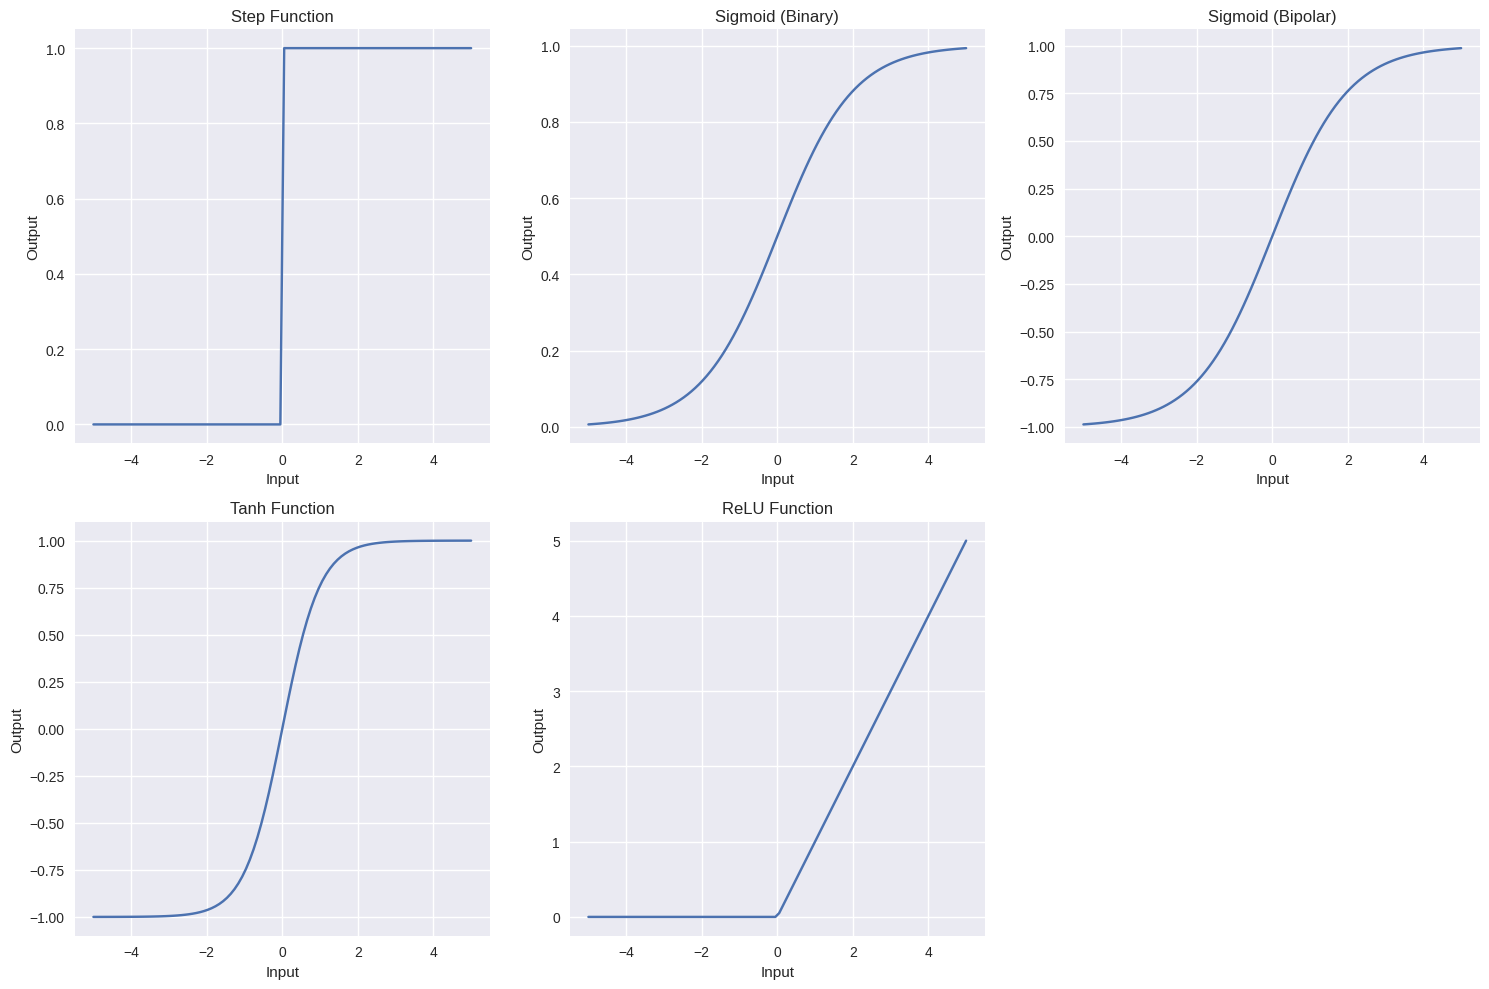

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step Function
def step_function(x):
  """Step function."""
  return 1 if x >= 0 else 0

# Sigmoid Function (Binary)
def sigmoid_binary(x):
  """Binary sigmoid function."""
  return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar)
def sigmoid_bipolar(x):
  """Bipolar sigmoid function."""
  return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh_function(x):
  """Hyperbolic tangent function."""
  return np.tanh(x)

# ReLU Function
def relu_function(x):
  """Rectified Linear Unit function."""
  return max(0, x)


# Generate input values
x = np.linspace(-5, 5, 100)

# Calculate output values for each activation function
y_step = [step_function(val) for val in x]
y_sigmoid_binary = [sigmoid_binary(val) for val in x]
y_sigmoid_bipolar = [sigmoid_bipolar(val) for val in x]
y_tanh = [tanh_function(val) for val in x]
y_relu = [relu_function(val) for val in x]

# Create plots for each activation function
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(x, y_step)
plt.title("Step Function")
plt.xlabel("Input")
plt.ylabel("Output")

plt.subplot(2, 3, 2)
plt.plot(x, y_sigmoid_binary)
plt.title("Sigmoid (Binary)")
plt.xlabel("Input")
plt.ylabel("Output")

plt.subplot(2, 3, 3)
plt.plot(x, y_sigmoid_bipolar)
plt.title("Sigmoid (Bipolar)")
plt.xlabel("Input")
plt.ylabel("Output")

plt.subplot(2, 3, 4)
plt.plot(x, y_tanh)
plt.title("Tanh Function")
plt.xlabel("Input")
plt.ylabel("Output")

plt.subplot(2, 3, 5)
plt.plot(x, y_relu)
plt.title("ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")


plt.tight_layout()
plt.show()





### Interpretation:

##### Step Function: Outputs either 0 or 1 based on a threshold. Useful for binary classification, but not differentiable, which limits its use in gradient-based learning algorithms.

##### Sigmoid (Binary): Outputs values between 0 and 1, making it suitable for representing probabilities.It's differentiable and allows for smooth transitions, often used in the output layer of binary classification models.

##### Sigmoid (Bipolar): Outputs values between -1 and 1, making it suitable for cases where negative values are needed.It shares similar characteristics with the binary sigmoid function in terms of differentiability and smooth transitions.

##### Tanh Function: Outputs values between -1 and 1, centered around 0. It is differentiable, and like the sigmoid, it offers smooth transitions. Often used in hidden layers due to its zero-centered property, which can help with convergence in training.

##### ReLU Function: Outputs 0 for negative inputs and the input itself for positive inputs. It's computationally efficient and differentiable for positive values. Often used in hidden layers of deep learning models because it has been shown to reduce vanishing gradient problems.

2. Implement a Simple Neural Network:

  - Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).
  - Train the network on a binary classification task (e.g., XOR problem) using a small dataset.
  - Compare the performance of the neural network with different activation
functions.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

# Softmax function for multinomial classification (output layer)
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement by subtracting max
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Forward propagation function
def forward(X, weights1, bias1, weights2, bias2, activation_function):
    # Hidden layer
    z1 = np.dot(X, weights1) + bias1
    a1 = activation_function(z1)

    # Output layer with softmax for multinomial classification
    z2 = np.dot(a1, weights2) + bias2
    a2 = softmax(z2)
    return a2

# Load the Iris dataset (for multinomial classification)
iris = load_iris()
X = iris.data
y = iris.target  # Multiclass labels: Setosa, Versicolor, Virginica
np.random.seed(60)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels for training
y_train_onehot = np.zeros((y_train.size, y_train.max() + 1))
y_train_onehot[np.arange(y_train.size), y_train] = 1

# Initialize weights and biases
input_size = 4  # Number of features
hidden_size = 8  # Number of neurons in the hidden layer
output_size = 3  # Number of output classes (Setosa, Versicolor, Virginica)

# Random initialization of weights and biases
weights1 = np.random.randn(input_size, hidden_size)
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size)
bias2 = np.zeros((1, output_size))

# Activation functions to test
activation_functions = [step_function, sigmoid_binary, sigmoid_bipolar, tanh_function, relu_function]
activation_names = ["Step", "Sigmoid Binary", "Sigmoid Bipolar", "Tanh", "ReLU"]

# Test each activation function
for activation_function, name in zip(activation_functions, activation_names):
    # Perform forward propagation (no training, just random weights)
    y_pred_probs = forward(X_test, weights1, bias1, weights2, bias2, activation_function)
    y_pred = np.argmax(y_pred_probs, axis=1)  # Choose the class with the highest probability

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {name} Activation Function: {accuracy:.4f}")


Accuracy with Step Activation Function: 0.3667
Accuracy with Sigmoid Binary Activation Function: 0.3667
Accuracy with Sigmoid Bipolar Activation Function: 0.1667
Accuracy with Tanh Activation Function: 0.0667
Accuracy with ReLU Activation Function: 0.3667




The Iris dataset is a classic dataset in machine learning used for classification tasks.

Here's a breakdown:

1. Features:
   - It has four features (also called input variables or attributes) that describe the physical characteristics of Iris flowers:
       - Sepal length
       - Sepal width
       - Petal length
       - Petal width

2. Target/Labels:
   - It has three classes (also called target variables or labels) that represent the species of Iris flowers:
       - Setosa
       - Versicolor
       - Virginica

3. Objective:
   - The main objective of using this dataset is to build a model that can accurately classify Iris flowers into their respective species based on their physical measurements.

In summary, the Iris dataset provides measurements of sepal and petal length and width for a set of Iris flowers, and the goal is to create a classification model to predict the species of a flower based on these measurements. It's commonly used to illustrate and understand basic machine learning concepts, particularly classification and model evaluation.

**Because of multinomial classification we use softmax**
